<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bar Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be provided to you in the form of an RDBMS.

You will use SQL queries to extract the necessary data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data

-   Visualize the relationship between two features

-   Visualize the composition of data

-   Visualize comparison of data


## Setup: Working with the Database
**Install the needed libraries**


In [1]:
!pip install pandas


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install matplotlib


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [3]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


'wget' is not recognized as an internal or external command,
operable program or batch file.


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Visualizing Data Distributions


##### 1. Histogram of `ConvertedCompYearly`


Visualize the distribution of yearly compensation (`ConvertedCompYearly`) using a histogram.



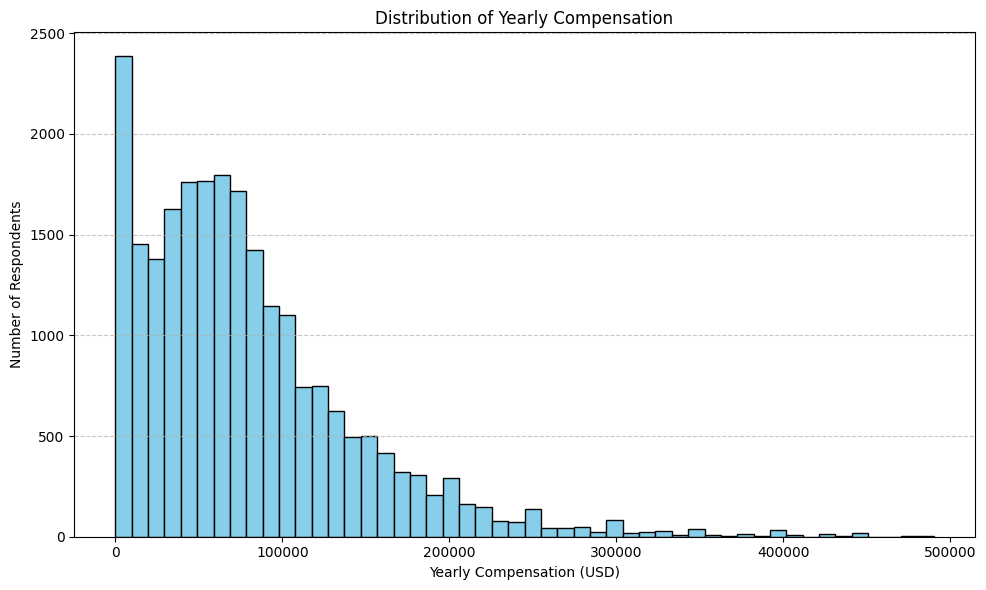

In [4]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (assuming you've already read it in as `df`)
# If not, replace this with the correct file or source
# Example: df = pd.read_csv('your_dataset.csv')

# Filter out missing or extreme outlier compensation values
df_comp = df[['ConvertedCompYearly']].dropna()
df_comp = df_comp[df_comp['ConvertedCompYearly'] < 500000]  # Optional: remove very high outliers

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(df_comp['ConvertedCompYearly'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Yearly Compensation')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Number of Respondents')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### 2. Box Plot of `Age`


Since `Age` is categorical in the dataset, convert it to numerical values for a box plot.



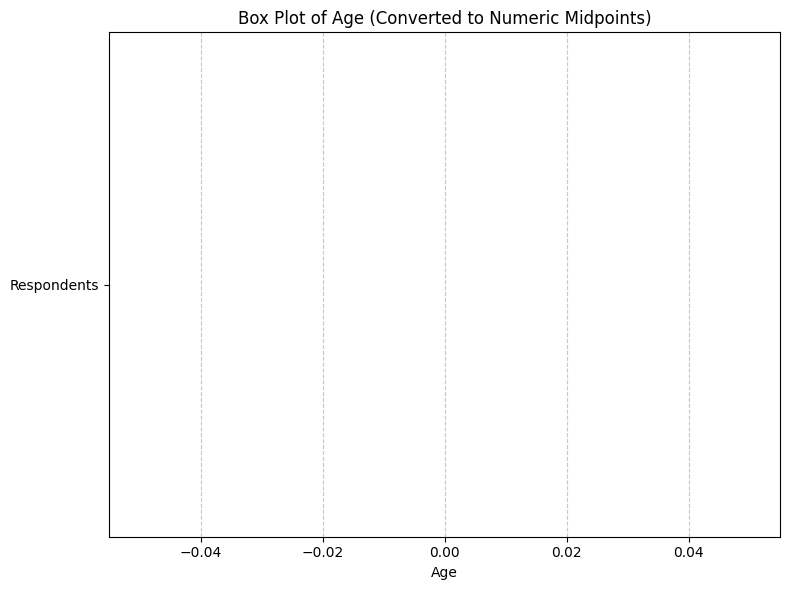

In [5]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Example mapping from categorical age groups to numeric midpoints
age_mapping = {
    '<18': 16,
    '18-24': 21,
    '25-34': 29.5,
    '35-44': 39.5,
    '45-54': 49.5,
    '55-64': 59.5,
    '65+': 70
}

# Filter and map age
df_age = df[['Age']].dropna()
df_age = df_age[df_age['Age'].isin(age_mapping.keys())]
df_age['AgeNumeric'] = df_age['Age'].map(age_mapping)

# Plot box plot
plt.figure(figsize=(8, 6))
plt.boxplot(df_age['AgeNumeric'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Box Plot of Age (Converted to Numeric Midpoints)')
plt.xlabel('Age')
plt.yticks([1], ['Respondents'])  # Dummy y-label
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Task 2: Visualizing Relationships in Data


##### 1. Scatter Plot of `Age_numeric` and `ConvertedCompYearly`


Explore the relationship between age and compensation.



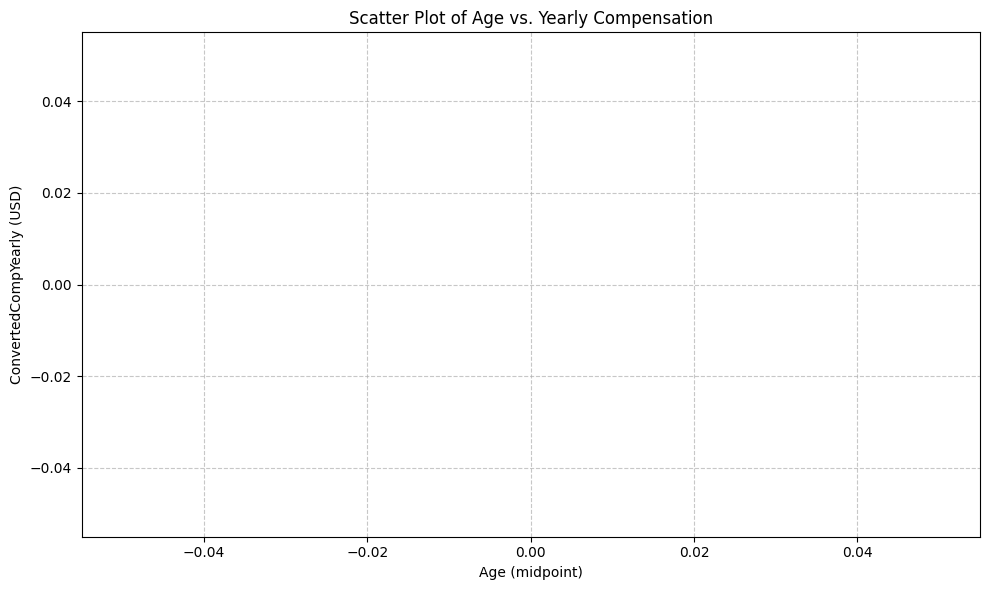

In [6]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Ensure age is mapped to numeric as before
age_mapping = {
    '<18': 16,
    '18-24': 21,
    '25-34': 29.5,
    '35-44': 39.5,
    '45-54': 49.5,
    '55-64': 59.5,
    '65+': 70
}

# Filter and prepare data
df_scatter = df[['Age', 'ConvertedCompYearly']].dropna()
df_scatter = df_scatter[df_scatter['Age'].isin(age_mapping.keys())]
df_scatter['Age_numeric'] = df_scatter['Age'].map(age_mapping)

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_scatter['Age_numeric'], df_scatter['ConvertedCompYearly'], alpha=0.5, c='teal', edgecolors='w', s=50)
plt.title('Scatter Plot of Age vs. Yearly Compensation')
plt.xlabel('Age (midpoint)')
plt.ylabel('ConvertedCompYearly (USD)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### 2. Bubble Plot of `ConvertedCompYearly` and `JobSatPoints_6` with `Age_numeric` as Bubble Size


Explore how compensation and job satisfaction are related, with age as the bubble size.


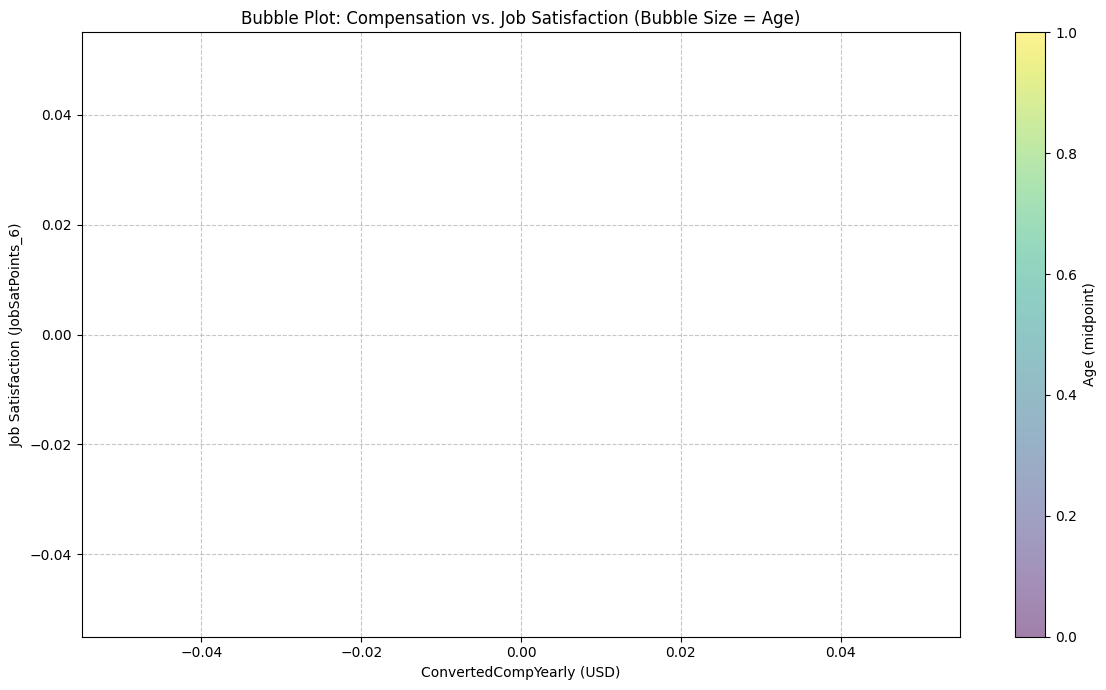

In [7]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Define age mapping again, if needed
age_mapping = {
    '<18': 16,
    '18-24': 21,
    '25-34': 29.5,
    '35-44': 39.5,
    '45-54': 49.5,
    '55-64': 59.5,
    '65+': 70
}

# Prepare the dataset
df_bubble = df[['ConvertedCompYearly', 'JobSatPoints_6', 'Age']].dropna()
df_bubble = df_bubble[df_bubble['Age'].isin(age_mapping.keys())]
df_bubble['Age_numeric'] = df_bubble['Age'].map(age_mapping)

# Normalize bubble size for visualization
df_bubble['BubbleSize'] = df_bubble['Age_numeric'] * 5  # scale for visibility

# Plot
plt.figure(figsize=(12, 7))
plt.scatter(
    df_bubble['ConvertedCompYearly'],
    df_bubble['JobSatPoints_6'],
    s=df_bubble['BubbleSize'],
    alpha=0.5,
    c=df_bubble['Age_numeric'],
    cmap='viridis',
    edgecolors='w'
)
plt.colorbar(label='Age (midpoint)')
plt.title('Bubble Plot: Compensation vs. Job Satisfaction (Bubble Size = Age)')
plt.xlabel('ConvertedCompYearly (USD)')
plt.ylabel('Job Satisfaction (JobSatPoints_6)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Task 3: Visualizing Composition of Data with Bar Charts


##### 1. Horizontal Bar Chart of `MainBranch` Distribution


Visualize the distribution of respondents’ primary roles to understand their professional focus.



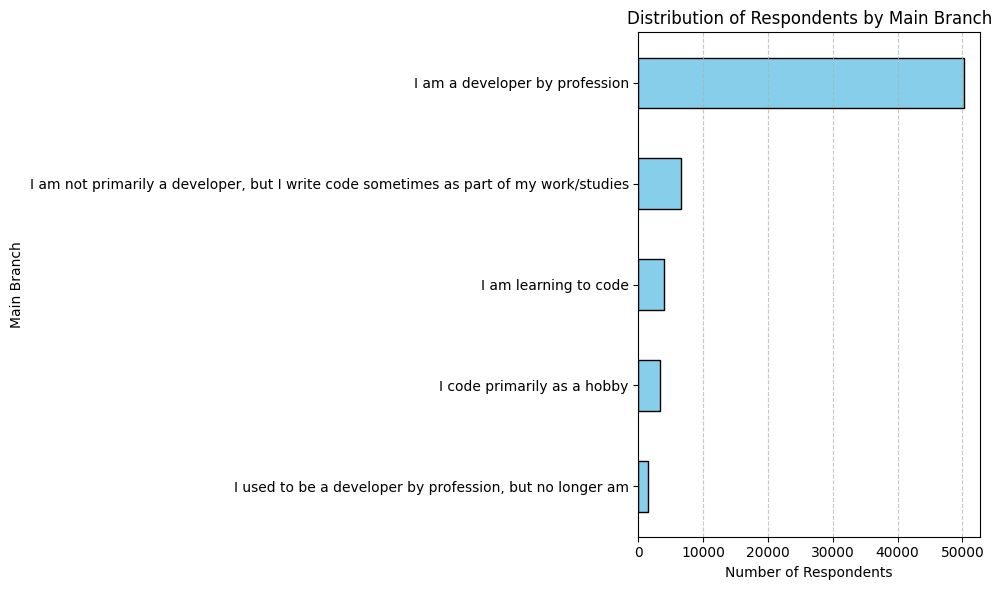

In [8]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Prepare the data
df_bar = df[['MainBranch']].dropna()
mainbranch_counts = df_bar['MainBranch'].value_counts()

# Step 2: Plot horizontal bar chart
plt.figure(figsize=(10, 6))
mainbranch_counts.sort_values().plot(kind='barh', color='skyblue', edgecolor='black')

plt.title('Distribution of Respondents by Main Branch')
plt.xlabel('Number of Respondents')
plt.ylabel('Main Branch')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### 2. Vertical Bar Chart of Top 5 Programming Languages Respondents Want to Work With


Identify the most desired programming languages based on `LanguageWantToWorkWith`.



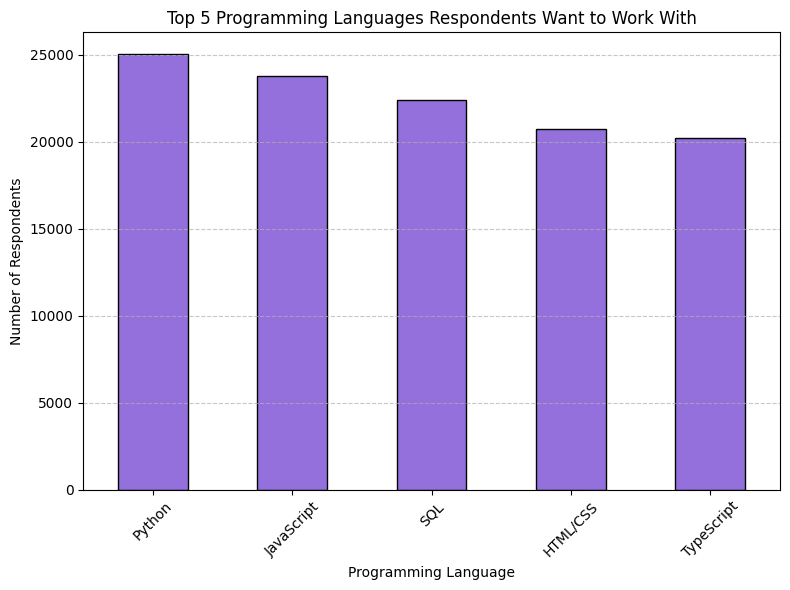

In [9]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Filter out missing values
df_lang = df[['LanguageWantToWorkWith']].dropna()

# Step 2: Split the semicolon-separated strings and explode into separate rows
df_lang_exploded = df_lang.assign(Language=df_lang['LanguageWantToWorkWith'].str.split(';')).explode('Language')

# Step 3: Count the frequency of each language
top_languages = df_lang_exploded['Language'].value_counts().head(5)

# Step 4: Plot vertical bar chart
plt.figure(figsize=(8, 6))
top_languages.plot(kind='bar', color='mediumpurple', edgecolor='black')

plt.title('Top 5 Programming Languages Respondents Want to Work With')
plt.xlabel('Programming Language')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### 3. Stacked Bar Chart of Median `JobSatPoints_6` and `JobSatPoints_7` by Age Group


Compare job satisfaction metrics across different age groups with a stacked bar chart.


C:\Users\rahim\AppData\Local\Temp\ipykernel_15676\1754192800.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_satisfaction = df_sat.groupby('AgeGroup')[['JobSatPoints_6', 'JobSatPoints_7']].median()


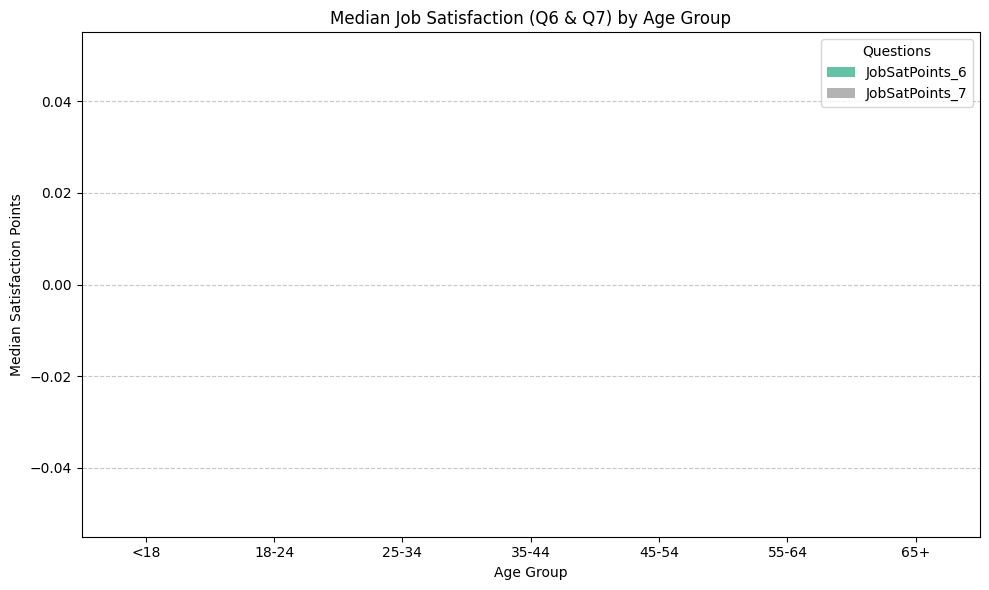

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Prepare the data
df_sat = df[['Age', 'JobSatPoints_6', 'JobSatPoints_7']].copy()

# Step 2: Convert Age to numeric (force errors to NaN)
df_sat['Age'] = pd.to_numeric(df_sat['Age'], errors='coerce')
df_sat = df_sat.dropna(subset=['Age', 'JobSatPoints_6', 'JobSatPoints_7'])

# Step 3: Create AgeGroup bins
age_bins = [0, 17, 24, 34, 44, 54, 64, 100]
age_labels = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df_sat['AgeGroup'] = pd.cut(df_sat['Age'], bins=age_bins, labels=age_labels)

# Step 4: Group by AgeGroup and calculate median satisfaction
median_satisfaction = df_sat.groupby('AgeGroup')[['JobSatPoints_6', 'JobSatPoints_7']].median()

# Step 5: Plot stacked bar chart
median_satisfaction.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')

plt.title('Median Job Satisfaction (Q6 & Q7) by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Satisfaction Points')
plt.legend(['JobSatPoints_6', 'JobSatPoints_7'], title='Questions')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### 4. Bar Chart of Database Popularity (`DatabaseHaveWorkedWith`)


Identify the most commonly used databases among respondents by visualizing `DatabaseHaveWorkedWith`.



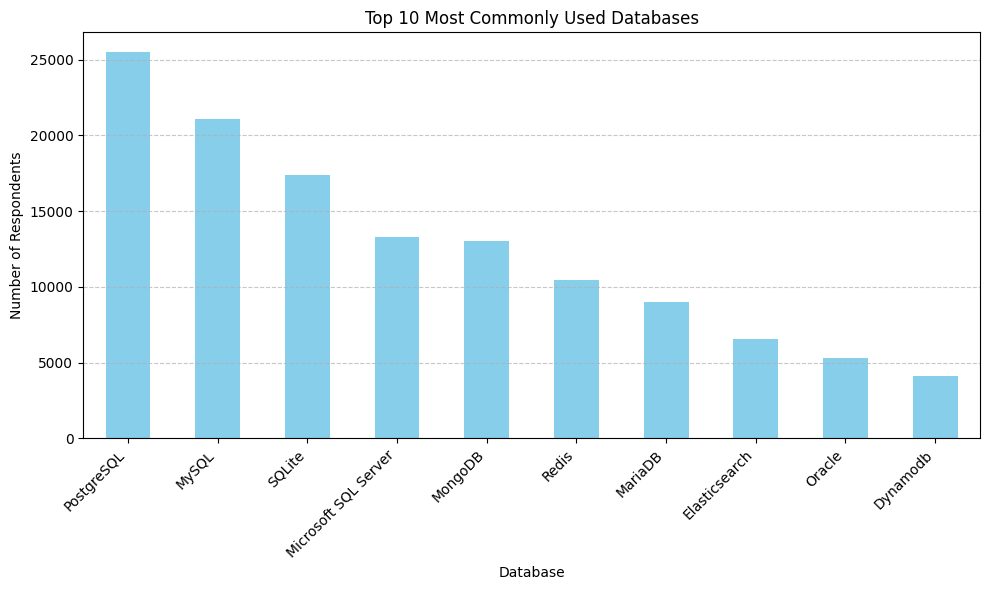

In [12]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Extract and clean data
df_db = df[['DatabaseHaveWorkedWith']].dropna()

# Step 2: Split semicolon-separated values into multiple rows
df_exploded = df_db['DatabaseHaveWorkedWith'].str.split(';').explode().str.strip()

# Step 3: Count frequency
db_counts = df_exploded.value_counts().sort_values(ascending=False)

# Step 4: Plot top 10 most popular databases
plt.figure(figsize=(10, 6))
db_counts.head(10).plot(kind='bar', color='skyblue')

plt.title('Top 10 Most Commonly Used Databases')
plt.xlabel('Database')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Task 4: Visualizing Comparison of Data with Bar Charts


##### 1. Grouped Bar Chart of Median `ConvertedCompYearly` for Different Age Groups


Compare median compensation across multiple age groups with a grouped bar chart.



C:\Users\rahim\AppData\Local\Temp\ipykernel_15676\4191658381.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_comp = df_grouped.groupby('AgeGroup')['ConvertedCompYearly'].median().reset_index()


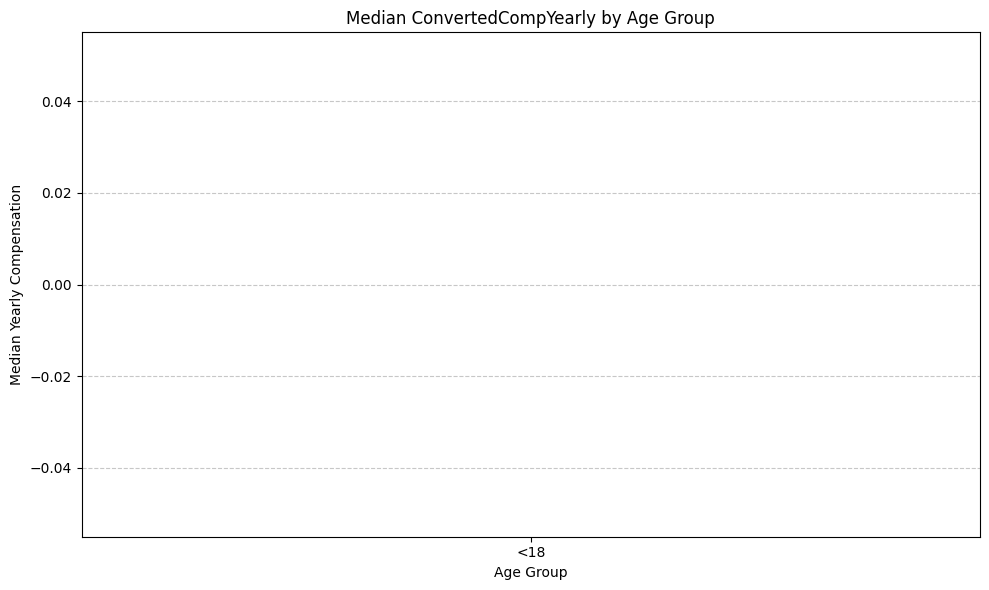

In [13]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Filter necessary columns and drop NaNs
df_grouped = df[['Age', 'ConvertedCompYearly']].dropna()

# Step 2: Define age bins and group labels
age_bins = [0, 17, 24, 34, 44, 54, 64, 100]
age_labels = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']

# Step 3: Convert age to numeric if needed
df_grouped['Age'] = pd.to_numeric(df_grouped['Age'], errors='coerce')
df_grouped = df_grouped.dropna()

# Step 4: Create AgeGroup category
df_grouped['AgeGroup'] = pd.cut(df_grouped['Age'], bins=age_bins, labels=age_labels)

# Step 5: Group by AgeGroup and compute median
median_comp = df_grouped.groupby('AgeGroup')['ConvertedCompYearly'].median().reset_index()

# Step 6: Plot grouped bar chart
plt.figure(figsize=(10, 6))
plt.bar(median_comp['AgeGroup'], median_comp['ConvertedCompYearly'], color='salmon')

plt.title('Median ConvertedCompYearly by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Yearly Compensation')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### 2. Bar Chart of Respondent Count by Country


Show the distribution of respondents by country to see which regions are most represented.



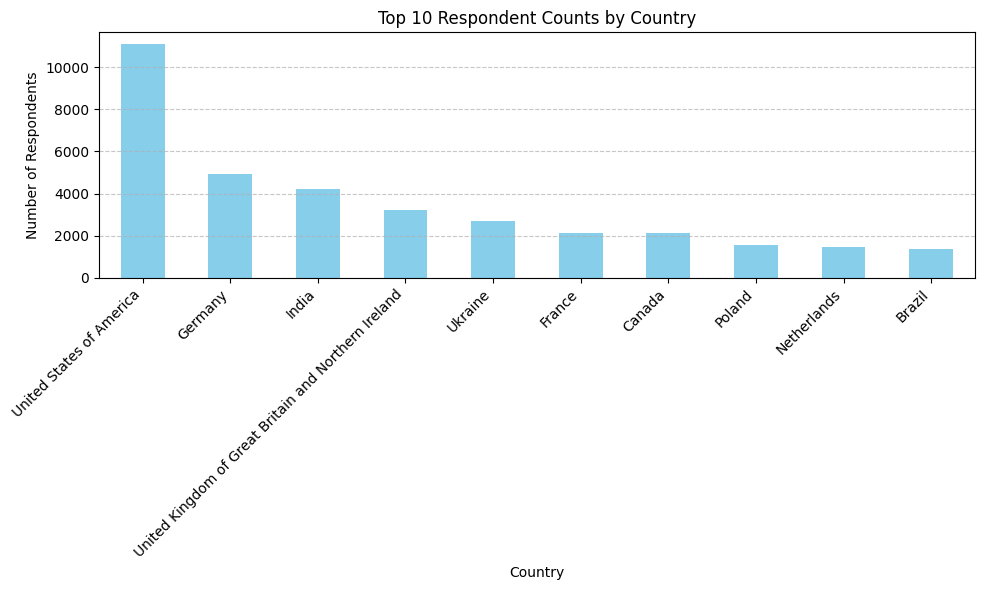

In [14]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Check if 'Country' column exists
if 'Country' in df.columns:
    # Step 2: Count number of respondents per country
    country_counts = df['Country'].value_counts().sort_values(ascending=False)

    # Optional: Limit to top 10 countries for readability
    top_countries = country_counts.head(10)

    # Step 3: Plot
    plt.figure(figsize=(10, 6))
    top_countries.plot(kind='bar', color='skyblue')

    plt.title('Top 10 Respondent Counts by Country')
    plt.xlabel('Country')
    plt.ylabel('Number of Respondents')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("❌ Column 'Country' not found in the dataset.")

### Final Step: Review


This lab demonstrates how to create and interpret different types of bar charts, allowing you to analyze the composition, comparison, and distribution of categorical data in the Stack Overflow dataset, including main professional branches, programming language preferences, and compensation by age group. Bar charts effectively compare counts and median values across various categories.


## Summary


After completing this lab, you will be able to:
- Create a horizontal bar chart to visualize the distribution of respondents' primary roles, helping to understand their professional focus.
- Develop a vertical bar chart to identify the most desired programming languages based on the LanguageWantToWorkWith variable.
- Use a stacked bar chart to compare job satisfaction metrics across different age groups.
- Create a bar chart to visualize the most commonly used databases among respondents using the DatabaseHaveWorkedWith variable.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
